In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# have plots render in notebook
%matplotlib inline

In [2]:
# Get my current WD
import os
path = os.getcwd()

In [3]:
print(path)

/project/Pablo


In [4]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  /project/Pablo


In [5]:
os.chdir("/project/Pablo")

In [6]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  /project/Pablo


In [7]:
# Now we can read the file from our new current direcotry 
# Ventilators_beds_region.to_csv('VENTILATORS BEDS REGION DATASET.csv')
VENT = pd.read_csv('VENTILATORS BEDS REGION DATASET.csv') 

In [27]:
VENT = pd.read_csv('VENTILATORS BEDS REGION DATASET.csv', index_col=0) 

In [28]:
VENT.head()

,Trust,Day,value,region_name
0,synthetic_trust_0,0,3,synthetic_region_0
1,synthetic_trust_1,0,3,synthetic_region_0
2,synthetic_trust_2,0,0,synthetic_region_0
3,synthetic_trust_3,0,26,synthetic_region_0
4,synthetic_trust_4,0,0,synthetic_region_0


In [29]:
TRAIN_data =VENT.iloc[0:26691]

In [30]:
TRAIN_data.to_csv('TRAIN_data.csv')

In [ ]:
# Separate last 49 time entries on each dataset 
# We use .ilocp[] to gather last 49 rows of data from our dataset 
# Only Run Test data once
TEST_data = VENT.iloc[26692:26732]

In [ ]:
# Write this TEST data as a .csv file
TEST_data.to_csv('TEST_data.csv')

## Plot time series top 5 trust highest average of occupied ventilators 

In [51]:
# Load in TRAIN data
# Avoid getting the "Unnamed:0" column in your data
# pd.read_csv(io.StringIO(df.to_csv(index=False)))
# df = pd.read_csv("amis.csv", index_col=0)
TRAIN_data = pd.read_csv('TRAIN_data.csv', index_col=0) 

In [103]:
TRAIN_data.head()

,Trust,Day,value,region_name
0,synthetic_trust_0,0,3,synthetic_region_0
1,synthetic_trust_1,0,3,synthetic_region_0
2,synthetic_trust_2,0,0,synthetic_region_0
3,synthetic_trust_3,0,26,synthetic_region_0
4,synthetic_trust_4,0,0,synthetic_region_0


In [55]:
TRAIN_data.set_index("Trust")

,Day,value,region_name
Trust,,,
synthetic_trust_0,0,3,synthetic_region_0
synthetic_trust_1,0,3,synthetic_region_0
synthetic_trust_2,0,0,synthetic_region_0
synthetic_trust_3,0,26,synthetic_region_0
synthetic_trust_4,0,0,synthetic_region_0
...,...,...,...
synthetic_trust_86,200,1,synthetic_region_4
synthetic_trust_87,200,10,synthetic_region_4
synthetic_trust_88,200,6,synthetic_region_4


In [67]:
# We can combine getting the mean and sorting them ascending
AVGTRUST01 =  TRAIN_data.groupby(["Trust"])[["value"]].mean().sort_values(by="value", ascending = False)

In [117]:
AVGTRUST01

0          1.5
1          1.5
2          0.0
3         13.0
4          0.0
         ...  
26686    100.5
26687    105.0
26688    103.0
26689    105.0
26690    100.0
Length: 26691, dtype: float64

In [118]:
# Subset just the top 5 rows from the dataset

AVGTRUST02 =  TRAIN_data.groupby(["Trust"])[["value"]].mean().sort_values(by="value", ascending = False)[0:5]

In [191]:
AVGTRUST02.head().index

Index(['synthetic_trust_3', 'synthetic_trust_69', 'synthetic_trust_12',
       'synthetic_trust_70', 'synthetic_trust_80'],
      dtype='object', name='Trust')

In [192]:
topnames=AVGTRUST02.head().index

In [193]:
TRAIN_data[topnames]

KeyError: "None of [Index(['synthetic_trust_3', 'synthetic_trust_69', 'synthetic_trust_12',\n       'synthetic_trust_70', 'synthetic_trust_80'],\n      dtype='object', name='Trust')] are in the [columns]"

In [109]:
AVGTRUST02.head()

,value
Trust,
synthetic_trust_3,96.880597
synthetic_trust_69,83.233831
synthetic_trust_12,53.348259
synthetic_trust_70,42.930348
synthetic_trust_80,34.278607


In [113]:
# Subset top 5 trust with highes average  as per table above
TOP5AVG =  TRAIN_data.loc[  (TRAIN_data['Trust']=='synthetic_trust_3') |
                            (TRAIN_data['Trust']=='synthetic_trust_69')  |
                            (TRAIN_data['Trust']=='synthetic_trust_12')  |
                            (TRAIN_data['Trust']=='synthetic_trust_70')  |
                            (TRAIN_data['Trust']=='synthetic_trust_80')
                         ] 


                           
                           

In [114]:
TOP5AVG.head()

,Trust,Day,value,region_name
3,synthetic_trust_3,0,26,synthetic_region_0
12,synthetic_trust_12,0,16,synthetic_region_0
69,synthetic_trust_69,0,41,synthetic_region_3
70,synthetic_trust_70,0,5,synthetic_region_4
80,synthetic_trust_80,0,22,synthetic_region_4


In [195]:
## continue this
# This doesn't work yet (keep on investigating it)
top5avgopt = TRAIN_data[[AVGTRUST02.head().index]]




KeyError: "None of [Index([('synthetic_trust_3', 'synthetic_trust_69', 'synthetic_trust_12', 'synthetic_trust_70', 'synthetic_trust_80')], dtype='object')] are in the [columns]"

In [115]:
TOP5AVG

,Trust,Day,value,region_name
3,synthetic_trust_3,0,26,synthetic_region_0
12,synthetic_trust_12,0,16,synthetic_region_0
69,synthetic_trust_69,0,41,synthetic_region_3
70,synthetic_trust_70,0,5,synthetic_region_4
80,synthetic_trust_80,0,22,synthetic_region_4
...,...,...,...,...
26603,synthetic_trust_3,200,85,synthetic_region_0
26612,synthetic_trust_12,200,59,synthetic_region_0
26669,synthetic_trust_69,200,96,synthetic_region_3
26670,synthetic_trust_70,200,44,synthetic_region_4


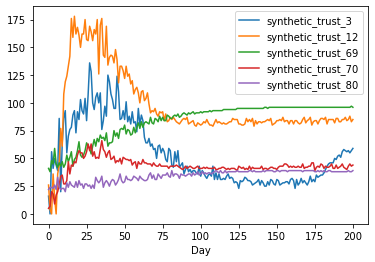

In [155]:
# Plot :URL How pandas uses matplotlib plus figures axes and subplots
fig, ax=plt.subplots()
TOP5AVG.groupby('Trust').plot(x='Day',
                             y='value',
                             ax=ax,
                              legend=True)
plt.legend(TOP5AVG["Trust"])
                              
                           #  legend=True).plt.legend(TOP5AVG["Trust"])

# Plot time series bottom 5 trusts sum through time

In [123]:
# TOP 5 TRUSTS
# We can combine getting the mean and sorting them ascending
SUMBOTTOM =  TRAIN_data.groupby(["Trust"])[["value"]].sum().sort_values(by="value", ascending = True)

In [124]:
SUMBOTTOM.head()

,value
Trust,
synthetic_trust_94,54
synthetic_trust_82,55
synthetic_trust_78,65
synthetic_trust_40,84
synthetic_trust_15,87


In [139]:
BOT5SUM =  TRAIN_data.loc[  (TRAIN_data['Trust']=='synthetic_trust_94') |
                            (TRAIN_data['Trust']=='synthetic_trust_82')  |
                            (TRAIN_data['Trust']=='synthetic_trust_78')  |
                            (TRAIN_data['Trust']=='synthetic_trust_40')  |
                            (TRAIN_data['Trust']=='synthetic_trust_15')
                         ] 

In [140]:
BOT5SUM

,Trust,Day,value,region_name
15,synthetic_trust_15,0,2,synthetic_region_0
40,synthetic_trust_40,0,2,synthetic_region_2
78,synthetic_trust_78,0,0,synthetic_region_4
82,synthetic_trust_82,0,0,synthetic_region_4
94,synthetic_trust_94,0,1,synthetic_region_5
...,...,...,...,...
26561,synthetic_trust_94,199,0,synthetic_region_5
26615,synthetic_trust_15,200,0,synthetic_region_0
26640,synthetic_trust_40,200,0,synthetic_region_2
26678,synthetic_trust_78,200,0,synthetic_region_4


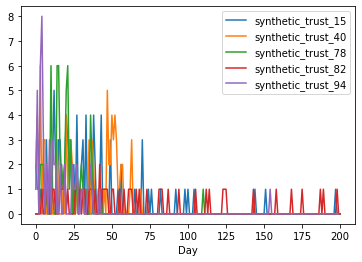

In [156]:
# Plot : Stack q: Iterate over pandas dataframe group by, select entries per grouped variable for specific column
fig2, ax=plt.subplots()
BOT5SUM.groupby('Trust').plot(x='Day',
                             y='value',
                             ax=ax,
                             legend=True)
# Include plt.legend for custom legends
plt.legend(BOT5SUM["Trust"])

# Aggregate all values such that you have a single time series of your data, plot this

In [157]:
TRAIN_data.head()

,Trust,Day,value,region_name
0,synthetic_trust_0,0,3,synthetic_region_0
1,synthetic_trust_1,0,3,synthetic_region_0
2,synthetic_trust_2,0,0,synthetic_region_0
3,synthetic_trust_3,0,26,synthetic_region_0
4,synthetic_trust_4,0,0,synthetic_region_0


In [164]:
# We can combine getting the mean and sorting them ascending
# We only need Day and value variables 
# .sort_values(by="value", ascending = True)
ALLVALUES =  TRAIN_data[['Day','value']]

In [165]:
ALLVALUES.head()

,Day,value
0,0,3
1,0,3
2,0,0
3,0,26
4,0,0


In [170]:
# Group daily values
ALLVALUES_day =  ALLVALUES.groupby(["Day"]).sum().sort_values(by="Day", ascending = True)

In [171]:
ALLVALUES_day.head()

,value
Day,
0,636
1,570
2,747
3,793
4,811


# Plot of the single time series

In [175]:
ALLVALUES_day.reset_index()

,Day,value
0,0,636
1,1,570
2,2,747
3,3,793
4,4,811
...,...,...
196,196,932
197,197,948
198,198,945
199,199,950


In [176]:
ALLVALUES_day.head()

,value
Day,
0,636
1,570
2,747
3,793
4,811


In [179]:
ALLVALUES_day.reset_index()

,Day,value
0,0,636
1,1,570
2,2,747
3,3,793
4,4,811
...,...,...
196,196,932
197,197,948
198,198,945
199,199,950


Text(0, 0.5, 'Total ventilator beds per day')

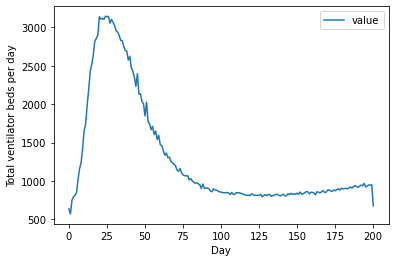

In [190]:
# Plot : Stack q: Iterate over pandas dataframe group by, select entries per grouped variable for specific column
ALLVALUES_day.plot()
plt.ylabel('Total ventilator beds per day')


In [196]:
ALLVALUES_day.head()

,value
Day,
0,636
1,570
2,747
3,793
4,811


In [198]:
ALLVALUES_day.reset_index()

,Day,value
0,0,636
1,1,570
2,2,747
3,3,793
4,4,811
...,...,...
196,196,932
197,197,948
198,198,945
199,199,950


In [199]:
# Add new variable to indicate national values
national = ALLVALUES_day

In [200]:
national.head()

,value
Day,
0,636
1,570
2,747
3,793
4,811


In [201]:
# Create new national variable
national.assign(national='national')

,value,national
Day,,
0,636,national
1,570,national
2,747,national
3,793,national
4,811,national
...,...,...
196,932,national
197,948,national
198,945,national


In [203]:
# save this file as csv
national.to_csv("national_vent_beds.csv")